In [1]:
from sklearn import datasets, model_selection, svm, metrics
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
##Prepare data##

filename=r'phishing.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')

data_train=data_train.dropna()
colnames = data_train.columns.get_values()


print("\nDESCRIBE DATA:\n",data_train.describe())


DESCRIBE DATA:
        having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       11055.000000  11055.000000        11055.000000      11055.000000   
mean            0.313795     -0.633198            0.738761          0.700588   
std             0.949534      0.766095            0.673998          0.713598   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              11055.000000   11055.000000       11055.000000   
mean                   0.741474      -0.734962           0.063953   
std                    0.671011       0.678139         

In [3]:
from sklearn.tree import DecisionTreeClassifier
###MAKE DECISION TREE###


X_all = data_train.drop(['Result'], axis=1)#data_train
#print(X_all)
y_all = data_train['Result']
#print(y_all.head())


test_size=0.1
train_size=5000

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=test_size, train_size=train_size)

print(X_test.shape)

####
clf = DecisionTreeClassifier(criterion="gini",
                             min_samples_split=100,
                             splitter='best',
                             max_depth=3)
clf.fit(X_train, y_train)


pre = clf.predict(X_test)


accuracy_score = metrics.accuracy_score(y_test, pre)

print("accuracy:", accuracy_score)

(1106, 30)
accuracy: 0.903254972875226


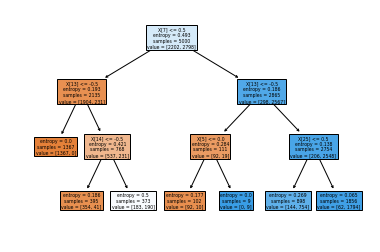

In [20]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(data_train))
#print(df_scaled)


plt.figure()
plot_tree(clf, filled=True)
plt.show()

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf, out_file='tree.dot', 
                feature_names = colnames[:30],
                class_names = colnames[30],
                rounded = True, proportion = False, 
                precision = 2, filled = True)




#xgb.plot_tree(clf, num_trees=2)
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(150, 100)
#fig.savefig('tree.png')
#plt.show()

In [ ]:
from yellowbrick.features import Rank2D

#df_scaled = pd.DataFrame(df_scaled, columns=colnames)
#print (df_scaled)
#df_scaled.columns=colnames
#print(df_scaled)

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(data_train)# or df_scaled
visualizer.show()